<a href="https://colab.research.google.com/github/alirezafarhadi01/Computational_Data_Mining/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Base Data (Part I) ===
A =
 [[1.  2. ]
 [1.  3. ]
 [1.  4.5]
 [1.  5.5]]
y =
 [[ 3.1]
 [ 4.9]
 [ 8.2]
 [10.1]]
Number of samples (m) = 4

=== Step 1.1 – Normal Equations ===
A^T A =
 [[ 4.  15. ]
 [15.  63.5]]
A^T y =
 [[ 26.3 ]
 [113.35]]

theta (Normal Equations) =
 [[-1.04137931]
 [ 2.03103448]]
Residuals (A theta_normal - y) =
 [[-0.07931034]
 [ 0.15172414]
 [-0.10172414]
 [ 0.02931034]]
Cost J(theta_normal) = 0.005064655172

=== Step 2.1 – Batch Gradient Descent (BGD) ===
Initial theta (BGD) =
 [[0.]
 [0.]]

Iteration    1:
  theta =
 [[0.06575 ]
 [0.283375]]
  gradient =
 [[ -6.575 ]
 [-28.3375]]
  cost J(theta) = 17.605728155273

Iteration    2:
  theta =
 [[0.12021594]
 [0.51929859]]
  gradient =
 [[ -5.44659375]
 [-23.59235938]]
  cost J(theta) = 12.234550920123

Iteration    5:
  theta =
 [[0.23329888]
 [1.01547531]]
  gradient =
 [[ -3.07514571]
 [-13.61934811]]
  cost J(theta) = 4.149473595881

Iteration   10:
  theta =
 [[0.32186282]
 [1.42222514]]
  gradient =
 [[-1.1

/tmp/ipython-input-3335454413.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost)  # convert 1x1 array to scalar


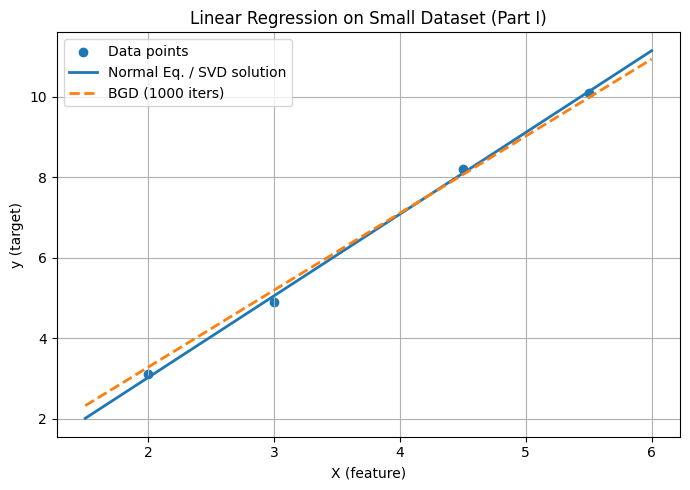

=== Plotting: BGD Convergence (Cost vs Iteration) ===


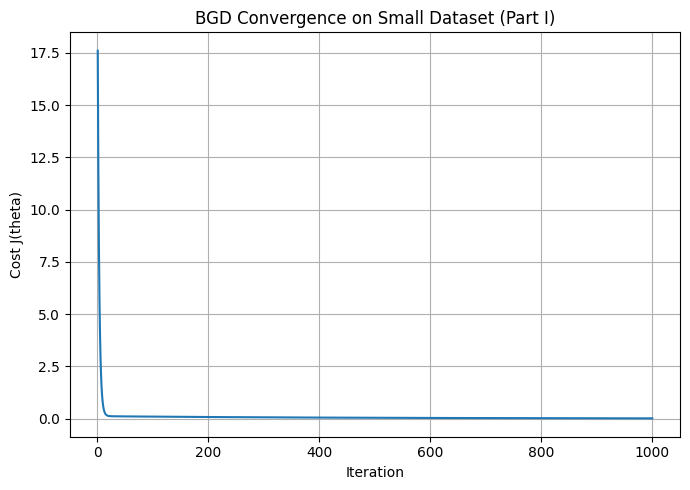

=== Step 4.1 – Numerical Stability with Collinearity ===
A_collinear =
 [[1.         2.         2.00003745]
 [1.         3.         3.00009507]
 [1.         4.5        4.5000732 ]
 [1.         5.5        5.50005987]]

A^T A (original) =
 [[ 4.  15. ]
 [15.  63.5]]
A_collinear^T A_collinear =
 [[ 4.         15.         15.00026559]
 [15.         63.5        63.50101878]
 [15.00026559 63.50101878 63.50203758]]

cond(A^T A) for original A              = 1.551056217459e+02
cond(A_collinear^T A_collinear)         = 1.557016387030e+11

theta (Normal Eq. with collinearity) =
 [[-8.53782625e-01]
 [ 3.43827452e+03]
 [-3.43623267e+03]]
Residuals (A_collinear theta_normal_col - y) =
 [[ 0.00121197]
 [ 0.04507277]
 [-0.11699835]
 [ 0.07066646]]
Cost J(theta_normal_col) = 0.002589423328

U (collinear) =
 [[-0.25860328 -0.77816695  0.5722836 ]
 [-0.38067338 -0.42740002 -0.75782446]
 [-0.56377192  0.09873138 -0.10845191]
 [-0.68583769  0.44948587  0.29399278]]
Singular values of A_collinear =
 [1.142

/tmp/ipython-input-3335454413.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost)  # convert 1x1 array to scalar


In [ ]:
# ============================================================
# Part I – Computational Foundations (Small Data)
# Normal Equations vs. Batch Gradient Descent vs. SVD
# + Numerical Stability with Collinearity
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make printing more precise and readable
np.set_printoptions(precision=8, suppress=False)

# ------------------------------------------------------------
# Base data (given in the assignment)
# ------------------------------------------------------------
np.random.seed(42)  # for reproducibility

# Design matrix A = [1, X]
A = np.array([
    [1.0, 2.0],
    [1.0, 3.0],
    [1.0, 4.5],
    [1.0, 5.5]
])

# Target vector y
y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1]
])

m = len(y)  # number of samples

print("=== Base Data (Part I) ===")
print("A =\n", A)
print("y =\n", y)
print("Number of samples (m) =", m)
print()


# ------------------------------------------------------------
# Helper functions
# ------------------------------------------------------------
def compute_cost(A, y, theta):
    """
    Compute the least-squares cost:
        J(theta) = (1 / (2m)) * ||A theta - y||^2_2
    """
    m = len(y)
    residual = A @ theta - y
    cost = (residual.T @ residual) / (2 * m)
    return float(cost)  # convert 1x1 array to scalar


def compute_gradient(A, y, theta):
    """
    Compute the gradient of J(theta):
        grad = (1/m) * A^T (A theta - y)
    """
    m = len(y)
    residual = A @ theta - y
    grad = (1 / m) * (A.T @ residual)
    return grad


# ============================================================
# Step 1.1 – Direct Method (Normal Equations)
# θ = (A^T A)^(-1) A^T y
# ============================================================

print("=== Step 1.1 – Normal Equations ===")

# Compute A^T A and A^T y
AtA = A.T @ A
Aty = A.T @ y

print("A^T A =\n", AtA)
print("A^T y =\n", Aty)
print()

# Compute theta using the normal equations
theta_normal = np.linalg.inv(AtA) @ Aty

# Compute cost and residuals
cost_normal = compute_cost(A, y, theta_normal)
residual_normal = A @ theta_normal - y

print("theta (Normal Equations) =\n", theta_normal)
print("Residuals (A theta_normal - y) =\n", residual_normal)
print("Cost J(theta_normal) = {:.12f}".format(cost_normal))
print()

# ============================================================
# Step 2.1 – Batch Gradient Descent (BGD)
# θ^{k+1} = θ^k - η * (1/m) * A^T (A θ^k - y)
# ============================================================

print("=== Step 2.1 – Batch Gradient Descent (BGD) ===")

learning_rate = 0.01
n_iterations = 1000

# Initialize theta at zero
theta_bgd = np.zeros((2, 1))
print("Initial theta (BGD) =\n", theta_bgd)
print()

cost_history_bgd = []

for it in range(1, n_iterations + 1):
    grad = compute_gradient(A, y, theta_bgd)
    theta_bgd = theta_bgd - learning_rate * grad
    cost = compute_cost(A, y, theta_bgd)
    cost_history_bgd.append(cost)

    # Print detailed information for a few selected iterations
    if it in [1, 2, 5, 10, 50, 100, 500, 1000]:
        print(f"Iteration {it:4d}:")
        print("  theta =\n", theta_bgd)
        print("  gradient =\n", grad)
        print("  cost J(theta) = {:.12f}".format(cost))
        print()

# Final BGD results
theta_bgd_final = theta_bgd
cost_bgd_final = cost_history_bgd[-1]
residual_bgd = A @ theta_bgd_final - y

print("Final theta (BGD after {} iterations) =\n".format(n_iterations), theta_bgd_final)
print("Final residuals (A theta_bgd - y) =\n", residual_bgd)
print("Final cost J(theta_bgd) = {:.12f}".format(cost_bgd_final))
print()


# ============================================================
# Step 3.1 – Stable Method via SVD (Pseudoinverse)
# A = U Σ V^T  →  A^+ = V Σ^+ U^T  →  θ = A^+ y
# ============================================================

print("=== Step 3.1 – SVD Pseudoinverse ===")

# Compute SVD: A = U Σ V^T
U, s, VT = np.linalg.svd(A, full_matrices=False)

print("U =\n", U)
print("Singular values s =\n", s)
print("V^T =\n", VT)
print()

# Build Σ and Σ^(-1)
Sigma = np.diag(s)
Sigma_inv = np.diag(1.0 / s)

print("Sigma (diagonal matrix of singular values) =\n", Sigma)
print("Sigma_inv (diagonal of inverse singular values) =\n", Sigma_inv)
print()

# Compute pseudoinverse A^+ = V Σ^+ U^T
A_pinv = VT.T @ Sigma_inv @ U.T
print("Pseudoinverse A^+ =\n", A_pinv)
print()

# Compute theta using SVD-based pseudoinverse
theta_svd = A_pinv @ y

# Compute cost and residuals
cost_svd = compute_cost(A, y, theta_svd)
residual_svd = A @ theta_svd - y

print("theta (SVD pseudoinverse) =\n", theta_svd)
print("Residuals (A theta_svd - y) =\n", residual_svd)
print("Cost J(theta_svd) = {:.12f}".format(cost_svd))
print()

# Compare normal equations vs SVD (they should be extremely close)
diff_norm_svd = np.linalg.norm(theta_normal - theta_svd)
print("||theta_normal - theta_svd||_2 = {:.12e}".format(diff_norm_svd))
print()


# ============================================================
# Comparison table: Normal vs BGD vs SVD (Base Data)
# ============================================================

print("=== Comparison Table – Part I (Base Data) ===")

results_theta = pd.DataFrame({
    "Method": ["Normal Eq.", "BGD (1000 iters)", "SVD Pseudoinverse"],
    "theta_0": [theta_normal[0, 0], theta_bgd_final[0, 0], theta_svd[0, 0]],
    "theta_1": [theta_normal[1, 0], theta_bgd_final[1, 0], theta_svd[1, 0]],
    "Cost J(theta)": [cost_normal, cost_bgd_final, cost_svd]
})

print(results_theta.to_string(index=False))
print()


# ============================================================
# Plot 1 – Data points + regression lines (Normal/SVD vs BGD)
# ============================================================

print("=== Plotting: Data + Regression Lines (Part I) ===")

x = A[:, 1]          # feature values
y_flat = y.flatten() # convert y to 1D for plotting

# Create a dense grid of x values for drawing the regression lines
x_line = np.linspace(x.min() - 0.5, x.max() + 0.5, 200)

# Line based on Normal Equations / SVD (they are essentially the same)
theta0_normal = theta_normal[0, 0]
theta1_normal = theta_normal[1, 0]
y_line_normal = theta0_normal + theta1_normal * x_line

# Line based on BGD (after 1000 iterations)
theta0_bgd = theta_bgd_final[0, 0]
theta1_bgd = theta_bgd_final[1, 0]
y_line_bgd = theta0_bgd + theta1_bgd * x_line

plt.figure(figsize=(7, 5))
plt.scatter(x, y_flat, marker='o', label='Data points')
plt.plot(x_line, y_line_normal, linewidth=2, label='Normal Eq. / SVD solution')
plt.plot(x_line, y_line_bgd, linestyle='--', linewidth=2, label='BGD (1000 iters)')
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.title('Linear Regression on Small Dataset (Part I)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ============================================================
# Plot 2 – BGD convergence: cost J(theta) vs. iteration
# ============================================================

print("=== Plotting: BGD Convergence (Cost vs Iteration) ===")

plt.figure(figsize=(7, 5))
plt.plot(range(1, n_iterations + 1), cost_history_bgd)
plt.xlabel('Iteration')
plt.ylabel('Cost J(theta)')
plt.title('BGD Convergence on Small Dataset (Part I)')
plt.grid(True)
plt.tight_layout()
plt.show()


# ============================================================
# Step 4.1 – Numerical Stability Analysis with Collinearity
# ============================================================

print("=== Step 4.1 – Numerical Stability with Collinearity ===")

# Construct a collinear matrix A_collinear:
# Third column is almost a copy of the second column (X) plus tiny noise.
noise = np.random.rand(m, 1) * 0.0001
A_collinear = np.hstack((A, A[:, [1]] + noise))  # columns: [1, X, X+noise]

print("A_collinear =\n", A_collinear)
print()

# Compute A^T A and A^T y for the original A and for A_collinear
AtA_original = A.T @ A
AtA_collinear = A_collinear.T @ A_collinear

Aty_collinear = A_collinear.T @ y

# Compute condition numbers
cond_AtA_original = np.linalg.cond(AtA_original)
cond_AtA_collinear = np.linalg.cond(AtA_collinear)

print("A^T A (original) =\n", AtA_original)
print("A_collinear^T A_collinear =\n", AtA_collinear)
print()
print("cond(A^T A) for original A              = {:.12e}".format(cond_AtA_original))
print("cond(A_collinear^T A_collinear)         = {:.12e}".format(cond_AtA_collinear))
print()

# Solve using Normal Equations on A_collinear
theta_normal_col = np.linalg.inv(AtA_collinear) @ Aty_collinear
cost_normal_col = compute_cost(A_collinear, y, theta_normal_col)
residual_normal_col = A_collinear @ theta_normal_col - y

print("theta (Normal Eq. with collinearity) =\n", theta_normal_col)
print("Residuals (A_collinear theta_normal_col - y) =\n", residual_normal_col)
print("Cost J(theta_normal_col) = {:.12f}".format(cost_normal_col))
print()

# Solve the same collinear problem using SVD-based pseudoinverse
U_c, s_c, VT_c = np.linalg.svd(A_collinear, full_matrices=False)

print("U (collinear) =\n", U_c)
print("Singular values of A_collinear =\n", s_c)
print("V^T (collinear) =\n", VT_c)
print()

Sigma_c = np.diag(s_c)
Sigma_inv_c = np.diag(1.0 / s_c)

print("Sigma (collinear) =\n", Sigma_c)
print("Sigma_inv (collinear) =\n", Sigma_inv_c)
print()

A_col_pinv = VT_c.T @ Sigma_inv_c @ U_c.T
theta_svd_col = A_col_pinv @ y
cost_svd_col = compute_cost(A_collinear, y, theta_svd_col)
residual_svd_col = A_collinear @ theta_svd_col - y

print("Pseudoinverse A_collinear^+ =\n", A_col_pinv)
print()
print("theta (SVD with collinearity) =\n", theta_svd_col)
print("Residuals (A_collinear theta_svd_col - y) =\n", residual_svd_col)
print("Cost J(theta_svd_col) = {:.12f}".format(cost_svd_col))
print()

# Comparison table for the collinear case
print("=== Comparison Table – Collinearity Case ===")

results_collinear = pd.DataFrame({
    "Method": ["Normal Eq. (collinear)", "SVD (collinear)"],
    "theta_0": [theta_normal_col[0, 0], theta_svd_col[0, 0]],
    "theta_1": [theta_normal_col[1, 0], theta_svd_col[1, 0]],
    "theta_2": [theta_normal_col[2, 0], theta_svd_col[2, 0]],
    "Cost J(theta)": [cost_normal_col, cost_svd_col]
})

print(results_collinear.to_string(index=False))
print()
print("Note: The condition number for the collinear system is extremely large,")
print("      indicating an ill-conditioned problem. Normal Equations become")
print("      numerically unstable, while the SVD-based solution is more reliable.")


=== Step 1.2 – Loading Auto MPG Dataset ===
First 5 rows of the cleaned dataset:
    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  ModelYear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   Origin                    CarName  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dataset shape after cleaning: (392, 9)

=== Step 2.2 – Preparing Design Matrix A and Target y ===
Number of samples (m) = 392
Horsepower (first 5):
 [[130.]
 [165.]
 [150.]
 [150.]
 [140.]]
MPG (fi

/tmp/ipython-input-1421755010.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(
/tmp/ipython-input-1421755010.py:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost)


Iteration 2000 (SGD):
  theta =
 [[23.3960179123]
 [-6.1565315729]]
  sample index = 299
  sample residual = -5.38074217178589
  cost J(theta) = 11.977006721177

Iteration 3000 (SGD):
  theta =
 [[23.6749709969]
 [-5.8824486549]]
  sample index = 254
  sample residual = 3.8983932680535354
  cost J(theta) = 12.015255006089

Iteration 4000 (SGD):
  theta =
 [[23.6458278396]
 [-6.5586902527]]
  sample index = 71
  sample residual = 0.8993469725519354
  cost J(theta) = 12.112264448479

Iteration 5000 (SGD):
  theta =
 [[22.8269849349]
 [-5.8924302818]]
  sample index = 177
  sample residual = 1.8375142161771585
  cost J(theta) = 12.178760735214

Final theta (SGD after 5000 iterations) =
 [[22.8269849349]
 [-5.8924302818]]
Final cost J(theta_sgd) = 12.178760735214
SGD runtime (seconds)   = 0.137008

=== Step 2.3.2 – Batch Gradient Descent (BGD) ===
Iteration    1 (BGD):
  theta =
 [[ 0.2344591837]
 [-0.060678724 ]]
  gradient =
 [[-23.4459183673]
 [  6.0678724034]]
  cost J(theta) = 299.400

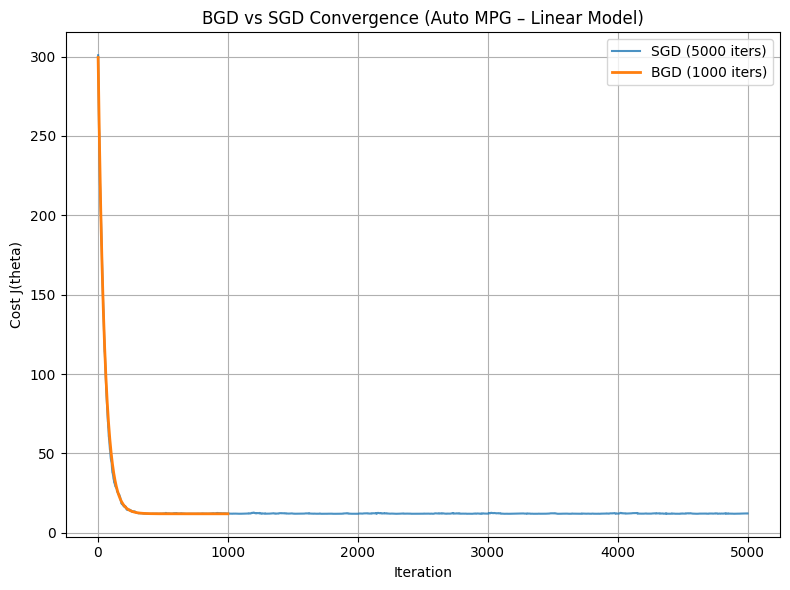

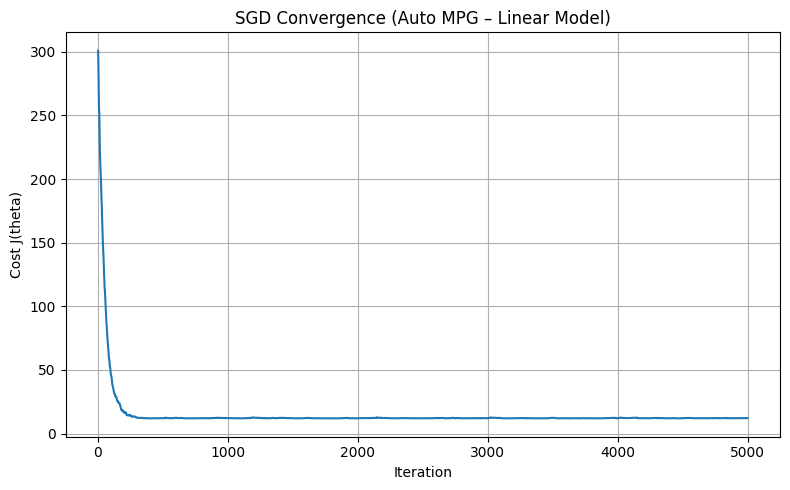

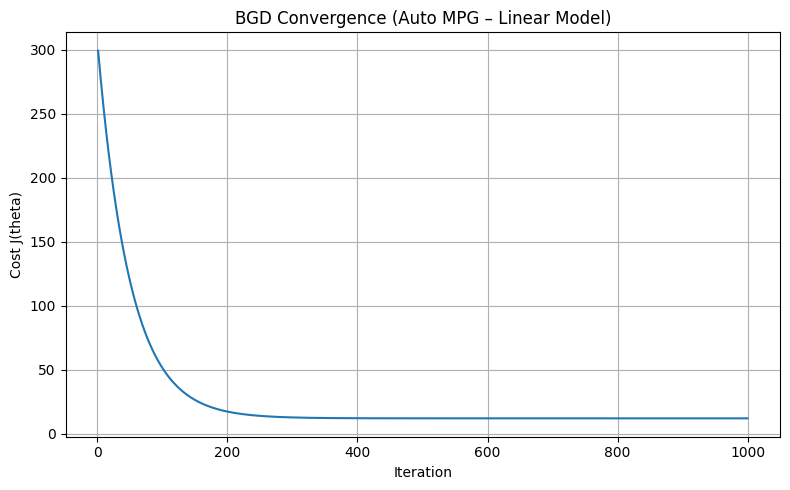

=== Optional Plot – Data + Fitted Lines (BGD vs SGD) ===


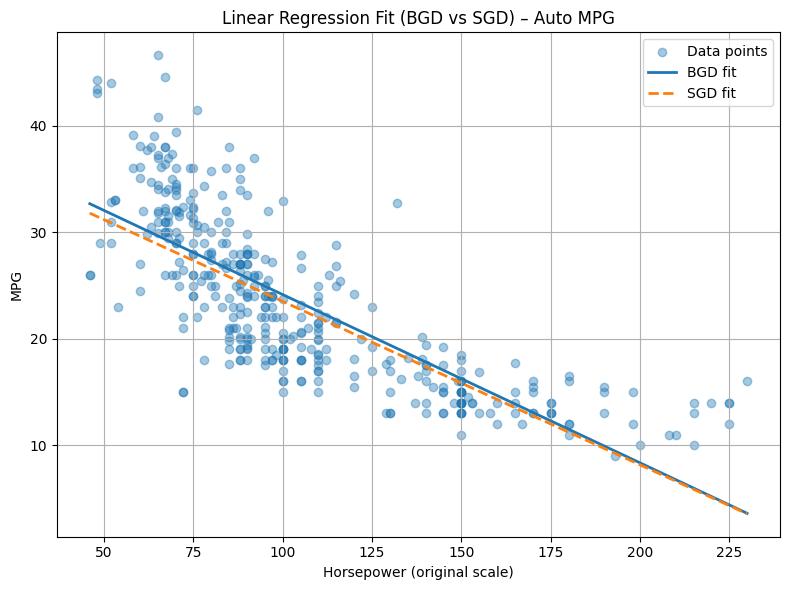

End of Part II script.


In [ ]:
# ============================================================
# Part II – Computational Scalability Analysis (Large Data)
# Auto MPG dataset – BGD vs SGD on a linear model:
#     MPG = theta_0 + theta_1 * Horsepower
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.set_printoptions(precision=10, suppress=False)

# ------------------------------------------------------------
# Step 1.2 – Load the Auto MPG dataset
# ------------------------------------------------------------

print("=== Step 1.2 – Loading Auto MPG Dataset ===")

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'ModelYear', 'Origin', 'CarName']

data_mpg = pd.read_csv(
    url,
    names=column_names,
    na_values='?',
    delim_whitespace=True
)

# Drop rows with missing Horsepower
data_mpg = data_mpg.dropna(subset=['Horsepower'])

# Convert Horsepower to float
data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

print("First 5 rows of the cleaned dataset:")
print(data_mpg.head())
print()
print("Dataset shape after cleaning:", data_mpg.shape)
print()


# ------------------------------------------------------------
# Step 2.2 – Prepare matrices A and y
# Model: MPG = theta_0 + theta_1 * Horsepower
# We will normalize the Horsepower feature for better convergence.
# ------------------------------------------------------------

print("=== Step 2.2 – Preparing Design Matrix A and Target y ===")

# Extract x (Horsepower) and y (MPG)
x_hp = data_mpg['Horsepower'].values.reshape(-1, 1)  # (m x 1)
y = data_mpg['MPG'].values.reshape(-1, 1)           # (m x 1)

m = len(y)  # number of samples

print("Number of samples (m) =", m)
print("Horsepower (first 5):\n", x_hp[:5])
print("MPG (first 5):\n", y[:5])
print()

# Normalize the Horsepower column (standardization: (x - mean) / std)
hp_mean = np.mean(x_hp)
hp_std = np.std(x_hp)

x_hp_norm = (x_hp - hp_mean) / hp_std

print("Horsepower mean =", hp_mean)
print("Horsepower std  =", hp_std)
print("Normalized Horsepower (first 5):\n", x_hp_norm[:5])
print()

# Build design matrix A:
#  - first column: ones (bias term)
#  - second column: normalized Horsepower
A = np.hstack([np.ones((m, 1)), x_hp_norm])  # (m x 2)

print("Design matrix A (first 5 rows):")
print(A[:5])
print("A shape =", A.shape)
print()


# ------------------------------------------------------------
# Helper functions – cost and gradient
# ------------------------------------------------------------

def compute_cost(A, y, theta):
    """
    Compute the least-squares cost:
        J(theta) = (1 / (2m)) * ||A theta - y||^2_2
    """
    m = len(y)
    residual = A @ theta - y
    cost = (residual.T @ residual) / (2 * m)
    return float(cost)


def compute_full_gradient(A, y, theta):
    """
    Compute the full gradient (for BGD):
        grad = (1/m) * A^T (A theta - y)
    """
    m = len(y)
    residual = A @ theta - y
    grad = (1 / m) * (A.T @ residual)
    return grad


# ============================================================
# Step 2.3 – Computational Comparison: SGD vs BGD
# ------------------------------------------------------------
# SGD: learning_rate = 0.01, n_iterations = 5000
# BGD: learning_rate = 0.01, n_iterations = 1000
# We track the full cost J(theta) at each iteration for both.
# ============================================================

# ------------------------------------------------------------
# 2.3.1 – Implement SGD
# ------------------------------------------------------------

print("=== Step 2.3.1 – Stochastic Gradient Descent (SGD) ===")

learning_rate_sgd = 0.01
n_iterations_sgd = 5000

# Initialize theta at zero
theta_sgd = np.zeros((2, 1))

cost_history_sgd = []
time_start_sgd = time.time()

np.random.seed(0)  # for reproducibility of SGD sampling

for it in range(1, n_iterations_sgd + 1):
    # Randomly pick a single sample index
    i = np.random.randint(m)
    A_i = A[i:i+1, :]      # shape (1, 2)
    y_i = y[i:i+1, :]      # shape (1, 1)

    # Compute sample-wise residual and gradient
    residual_i = A_i @ theta_sgd - y_i          # (1 x 1)
    grad_i = A_i.T @ residual_i                 # (2 x 1), no 1/m because it's a single sample

    # SGD update
    theta_sgd = theta_sgd - learning_rate_sgd * grad_i

    # Compute full cost over all data (for tracking and plotting)
    cost = compute_cost(A, y, theta_sgd)
    cost_history_sgd.append(cost)

    # Print details for selected iterations
    if it in [1, 2, 5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000]:
        print(f"Iteration {it:4d} (SGD):")
        print("  theta =\n", theta_sgd)
        print("  sample index =", i)
        print("  sample residual =", residual_i[0, 0])
        print("  cost J(theta) = {:.12f}".format(cost))
        print()

time_end_sgd = time.time()
sgd_runtime = time_end_sgd - time_start_sgd

# Final SGD results
theta_sgd_final = theta_sgd
cost_sgd_final = cost_history_sgd[-1]
residual_sgd_final = A @ theta_sgd_final - y

print("Final theta (SGD after {} iterations) =\n".format(n_iterations_sgd), theta_sgd_final)
print("Final cost J(theta_sgd) = {:.12f}".format(cost_sgd_final))
print("SGD runtime (seconds)   = {:.6f}".format(sgd_runtime))
print()


# ------------------------------------------------------------
# 2.3.2 – Implement BGD
# ------------------------------------------------------------

print("=== Step 2.3.2 – Batch Gradient Descent (BGD) ===")

learning_rate_bgd = 0.01
n_iterations_bgd = 1000

theta_bgd = np.zeros((2, 1))

cost_history_bgd = []
time_start_bgd = time.time()

for it in range(1, n_iterations_bgd + 1):
    grad = compute_full_gradient(A, y, theta_bgd)
    theta_bgd = theta_bgd - learning_rate_bgd * grad

    cost = compute_cost(A, y, theta_bgd)
    cost_history_bgd.append(cost)

    # Print details for selected iterations
    if it in [1, 2, 5, 10, 50, 100, 500, 1000]:
        print(f"Iteration {it:4d} (BGD):")
        print("  theta =\n", theta_bgd)
        print("  gradient =\n", grad)
        print("  cost J(theta) = {:.12f}".format(cost))
        print()

time_end_bgd = time.time()
bgd_runtime = time_end_bgd - time_start_bgd

theta_bgd_final = theta_bgd
cost_bgd_final = cost_history_bgd[-1]
residual_bgd_final = A @ theta_bgd_final - y

print("Final theta (BGD after {} iterations) =\n".format(n_iterations_bgd), theta_bgd_final)
print("Final cost J(theta_bgd) = {:.12f}".format(cost_bgd_final))
print("BGD runtime (seconds)   = {:.6f}".format(bgd_runtime))
print()


# ------------------------------------------------------------
# 2.3.3 – Summary table (theta and cost for SGD vs BGD)
# ------------------------------------------------------------

print("=== Summary – BGD vs SGD (Linear Model on Auto MPG) ===")

results_part2 = pd.DataFrame({
    "Method": ["SGD (5000 iters)", "BGD (1000 iters)"],
    "theta_0": [theta_sgd_final[0, 0],       theta_bgd_final[0, 0]],
    "theta_1": [theta_sgd_final[1, 0],       theta_bgd_final[1, 0]],
    "Final Cost J(theta)": [cost_sgd_final,  cost_bgd_final],
    "Runtime (sec)": [sgd_runtime,          bgd_runtime]
})

print(results_part2.to_string(index=False))
print()


# ============================================================
# Step 4.2 – Scalability Analysis (Plots)
# ------------------------------------------------------------
# 4.2.1 – Convergence plot (iterations vs cost) for both methods
# ============================================================

print("=== Step 4.2 – Convergence Plots ===")

# Plot cost vs iteration for both methods on the same figure
plt.figure(figsize=(8, 6))

plt.plot(range(1, n_iterations_sgd + 1), cost_history_sgd,
         label='SGD (5000 iters)', alpha=0.8)
plt.plot(range(1, n_iterations_bgd + 1), cost_history_bgd,
         label='BGD (1000 iters)', linewidth=2)

plt.xlabel('Iteration')
plt.ylabel('Cost J(theta)')
plt.title('BGD vs SGD Convergence (Auto MPG – Linear Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ------------------------------------------------------------
# (Optional) – Separate plots for each method
# ------------------------------------------------------------

# SGD convergence alone
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_iterations_sgd + 1), cost_history_sgd)
plt.xlabel('Iteration')
plt.ylabel('Cost J(theta)')
plt.title('SGD Convergence (Auto MPG – Linear Model)')
plt.grid(True)
plt.tight_layout()
plt.show()

# BGD convergence alone
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_iterations_bgd + 1), cost_history_bgd)
plt.xlabel('Iteration')
plt.ylabel('Cost J(theta)')
plt.title('BGD Convergence (Auto MPG – Linear Model)')
plt.grid(True)
plt.tight_layout()
plt.show()


# ------------------------------------------------------------
# (Optional, but nice) – Visualizing the fitted regression lines
# using BGD and SGD on the original (non-normalized) Horsepower axis.
# ------------------------------------------------------------

print("=== Optional Plot – Data + Fitted Lines (BGD vs SGD) ===")

# We built the model on normalized Horsepower; for plotting on
# the original Horsepower scale, we:
#   1) create a range of Horsepower values (original scale),
#   2) normalize them using (x - hp_mean)/hp_std,
#   3) apply the learned parameters (theta),
#   4) plot the resulting MPG predictions.

hp_min, hp_max = x_hp.min(), x_hp.max()
hp_grid = np.linspace(hp_min, hp_max, 200).reshape(-1, 1)
hp_grid_norm = (hp_grid - hp_mean) / hp_std

# Design matrix for grid
A_grid = np.hstack([np.ones((hp_grid_norm.shape[0], 1)), hp_grid_norm])

# Predictions from BGD and SGD
y_pred_bgd = A_grid @ theta_bgd_final
y_pred_sgd = A_grid @ theta_sgd_final

plt.figure(figsize=(8, 6))
plt.scatter(x_hp, y, alpha=0.4, label='Data points')
plt.plot(hp_grid, y_pred_bgd, linewidth=2, label='BGD fit')
plt.plot(hp_grid, y_pred_sgd, linestyle='--', linewidth=2, label='SGD fit')
plt.xlabel('Horsepower (original scale)')
plt.ylabel('MPG')
plt.title('Linear Regression Fit (BGD vs SGD) – Auto MPG')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("End of Part II script.")


=== Step 1.3.1 – Loading Auto MPG Dataset ===
First 5 rows of the cleaned dataset:
    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  ModelYear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   Origin                    CarName  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dataset shape after cleaning: (392, 9)

=== Step 1.3.2 – Building Polynomial Design Matrix A_poly ===
Number of samples (m) = 392
Horsepower (first 5):
 [[130.]
 [165.]
 [150.]
 [150.]
 [140.]]
M

/tmp/ipython-input-3982910707.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(
/tmp/ipython-input-3982910707.py:115: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost)


Iteration 4000 (SGD poly):
  theta =
 [[ 23.6449729286]
 [-11.158603537 ]
 [  4.9783131094]]
  sample index = 71
  sample residual = 0.5832921832379263
  cost J(theta) = 10.386812462583

Iteration 6000 (SGD poly):
  theta =
 [[ 22.9373729023]
 [-12.7867502967]
 [  7.2016398429]]
  sample index = 322
  sample residual = -11.038124987030592
  cost J(theta) = 10.088572702058

Iteration 8000 (SGD poly):
  theta =
 [[ 23.3805741106]
 [-14.2160943944]
 [  8.9178766177]]
  sample index = 70
  sample residual = 4.479607246593286
  cost J(theta) = 9.852819318033

Final theta (SGD polynomial, after 8000 iterations) =
 [[ 23.3805741106]
 [-14.2160943944]
 [  8.9178766177]]
Final cost J(theta_sgd_poly) = 9.852819318033
SGD polynomial runtime (seconds) = 0.203666

=== Optional – Normal Equations for Polynomial Model ===
theta (Normal Equations, polynomial) =
 [[ 23.4459183673]
 [-17.9212770056]
 [ 12.060766754 ]]
Cost J(theta_normal_poly) = 9.492384453809
||theta_normal_poly - theta_sgd_poly||_2 = 

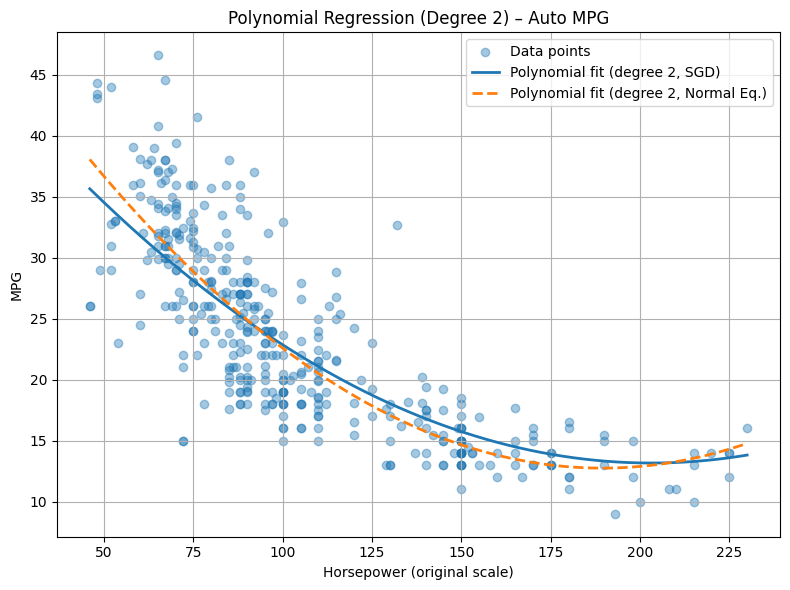

=== Optional – SGD Polynomial Convergence Plot ===


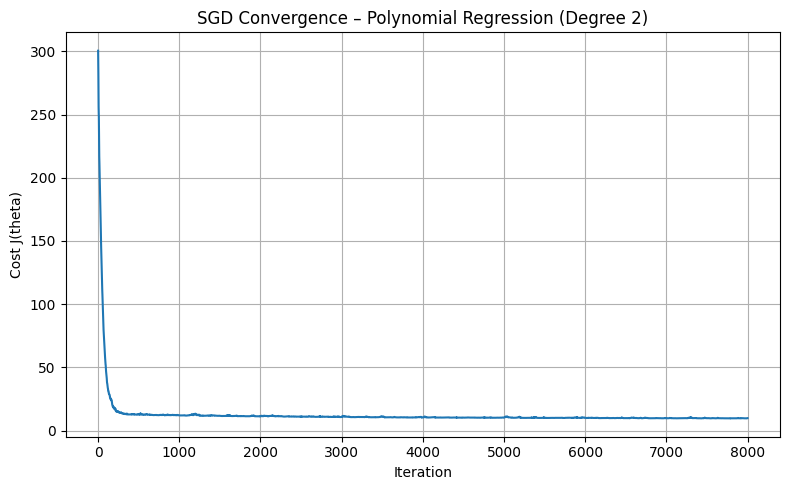

End of Part III script.


In [ ]:
# ============================================================
# Part III – Application (Nonlinear Regression)
# Auto MPG dataset – Polynomial Regression (degree 2):
#     MPG = theta_0 + theta_1 * x + theta_2 * x^2
# where x = Horsepower (with column-wise normalization)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.set_printoptions(precision=10, suppress=False)

# ------------------------------------------------------------
# Step 1.3.1 – Load the Auto MPG dataset
# ------------------------------------------------------------

print("=== Step 1.3.1 – Loading Auto MPG Dataset ===")

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'ModelYear', 'Origin', 'CarName']

data_mpg = pd.read_csv(
    url,
    names=column_names,
    na_values='?',
    delim_whitespace=True
)

# Drop rows with missing Horsepower
data_mpg = data_mpg.dropna(subset=['Horsepower'])

# Convert Horsepower to float
data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

print("First 5 rows of the cleaned dataset:")
print(data_mpg.head())
print()
print("Dataset shape after cleaning:", data_mpg.shape)
print()


# ------------------------------------------------------------
# Step 1.3.2 – Build polynomial design matrix A_poly
# Model: MPG = theta_0 + theta_1 * x + theta_2 * x^2
# where x is the (raw) Horsepower variable.
# Then normalize the feature columns.
# ------------------------------------------------------------

print("=== Step 1.3.2 – Building Polynomial Design Matrix A_poly ===")

# Extract x (Horsepower) and y (MPG)
x_hp = data_mpg['Horsepower'].values.reshape(-1, 1)  # (m x 1)
y = data_mpg['MPG'].values.reshape(-1, 1)           # (m x 1)

m = len(y)  # number of samples

print("Number of samples (m) =", m)
print("Horsepower (first 5):\n", x_hp[:5])
print("MPG (first 5):\n", y[:5])
print()

# Construct polynomial features: x and x^2 (on the original scale)
x1_raw = x_hp                         # x
x2_raw = x_hp ** 2                    # x^2

# Stack them into a feature matrix (without bias yet)
X_poly_raw = np.hstack([x1_raw, x2_raw])   # shape: (m x 2)

print("Raw polynomial features (first 5 rows):")
print("Columns: [x, x^2]")
print(X_poly_raw[:5])
print()

# Normalize each feature column (standardization: (col - mean)/std)
means_poly = np.mean(X_poly_raw, axis=0)   # shape: (2,)
stds_poly  = np.std(X_poly_raw, axis=0)    # shape: (2,)

X_poly_norm = (X_poly_raw - means_poly) / stds_poly

print("Means of [x, x^2] =", means_poly)
print("Stds  of [x, x^2] =", stds_poly)
print("Normalized polynomial features (first 5 rows):")
print(X_poly_norm[:5])
print()

# Build full design matrix A_poly:
#   column 0: ones (bias)
#   column 1: normalized x
#   column 2: normalized x^2
A_poly = np.hstack([np.ones((m, 1)), X_poly_norm])   # (m x 3)

print("Design matrix A_poly (first 5 rows):")
print("Columns: [1, x_norm, x2_norm]")
print(A_poly[:5])
print("A_poly shape =", A_poly.shape)
print()


# ------------------------------------------------------------
# Helper functions – cost and gradient
# ------------------------------------------------------------

def compute_cost(A, y, theta):
    """
    Compute the least-squares cost:
        J(theta) = (1 / (2m)) * ||A theta - y||^2_2
    """
    m = len(y)
    residual = A @ theta - y
    cost = (residual.T @ residual) / (2 * m)
    return float(cost)


# ============================================================
# Step 1.3.3 – Compute theta using SGD (same style as Part II)
# ============================================================

print("=== Step 1.3.3 – Stochastic Gradient Descent (SGD) for Polynomial Model ===")

learning_rate_sgd = 0.01
n_iterations_sgd = 8000   # a bit larger to ensure good convergence

theta_sgd_poly = np.zeros((3, 1))  # [theta_0, theta_1, theta_2]^T

cost_history_sgd_poly = []
time_start_sgd_poly = time.time()

np.random.seed(0)  # for reproducibility

for it in range(1, n_iterations_sgd + 1):
    # Randomly pick a single sample index
    i = np.random.randint(m)
    A_i = A_poly[i:i+1, :]   # shape (1, 3)
    y_i = y[i:i+1, :]        # shape (1, 1)

    # Compute sample-wise residual and gradient
    residual_i = A_i @ theta_sgd_poly - y_i      # (1 x 1)
    grad_i = A_i.T @ residual_i                  # (3 x 1)

    # SGD update
    theta_sgd_poly = theta_sgd_poly - learning_rate_sgd * grad_i

    # Compute full cost over all data for tracking
    cost = compute_cost(A_poly, y, theta_sgd_poly)
    cost_history_sgd_poly.append(cost)

    # Print details for selected iterations
    if it in [1, 2, 5, 10, 50, 100, 500, 1000, 2000, 4000, 6000, 8000]:
        print(f"Iteration {it:4d} (SGD poly):")
        print("  theta =\n", theta_sgd_poly)
        print("  sample index =", i)
        print("  sample residual =", residual_i[0, 0])
        print("  cost J(theta) = {:.12f}".format(cost))
        print()

time_end_sgd_poly = time.time()
sgd_poly_runtime = time_end_sgd_poly - time_start_sgd_poly

theta_sgd_poly_final = theta_sgd_poly
cost_sgd_poly_final = cost_history_sgd_poly[-1]
residual_sgd_poly_final = A_poly @ theta_sgd_poly_final - y

print("Final theta (SGD polynomial, after {} iterations) =\n".format(n_iterations_sgd),
      theta_sgd_poly_final)
print("Final cost J(theta_sgd_poly) = {:.12f}".format(cost_sgd_poly_final))
print("SGD polynomial runtime (seconds) = {:.6f}".format(sgd_poly_runtime))
print()


# ------------------------------------------------------------
# (Optional but useful) – Compare with Normal Equations solution
# for the same normalized polynomial design matrix A_poly
# ------------------------------------------------------------

print("=== Optional – Normal Equations for Polynomial Model ===")

AtA_poly = A_poly.T @ A_poly
Aty_poly = A_poly.T @ y

theta_normal_poly = np.linalg.inv(AtA_poly) @ Aty_poly
cost_normal_poly = compute_cost(A_poly, y, theta_normal_poly)
residual_normal_poly = A_poly @ theta_normal_poly - y

print("theta (Normal Equations, polynomial) =\n", theta_normal_poly)
print("Cost J(theta_normal_poly) = {:.12f}".format(cost_normal_poly))
diff_norm_poly = np.linalg.norm(theta_normal_poly - theta_sgd_poly_final)
print("||theta_normal_poly - theta_sgd_poly||_2 = {:.12e}".format(diff_norm_poly))
print()


# ------------------------------------------------------------
# Small summary table for theta and costs (SGD vs Normal)
# ------------------------------------------------------------

summary_poly = pd.DataFrame({
    "Method": ["SGD (poly)", "Normal Eq. (poly)"],
    "theta_0": [theta_sgd_poly_final[0, 0],  theta_normal_poly[0, 0]],
    "theta_1": [theta_sgd_poly_final[1, 0],  theta_normal_poly[1, 0]],
    "theta_2": [theta_sgd_poly_final[2, 0],  theta_normal_poly[2, 0]],
    "Cost J(theta)": [cost_sgd_poly_final,   cost_normal_poly]
})

print("=== Summary – Polynomial Model (SGD vs Normal Equations) ===")
print(summary_poly.to_string(index=False))
print()


# ============================================================
# Step 1.3.4 – Plot regression curve over scatter plot of data
# ============================================================

print("=== Step 1.3.4 – Plotting Polynomial Regression Curve ===")

# We built the model in terms of normalized features [x_norm, x2_norm].
# To plot the curve vs the original Horsepower axis, we:
#   1) Create a range (grid) of Horsepower values (original scale),
#   2) Compute x and x^2 in the original scale,
#   3) Normalize each using the same means/stds as before,
#   4) Build A_grid_poly and compute predictions using theta_sgd_poly_final.

hp_min, hp_max = x_hp.min(), x_hp.max()
hp_grid = np.linspace(hp_min, hp_max, 300).reshape(-1, 1)

# Raw polynomial features on the grid
x1_grid_raw = hp_grid
x2_grid_raw = hp_grid ** 2
X_grid_poly_raw = np.hstack([x1_grid_raw, x2_grid_raw])

# Normalize using previously computed means and stds
X_grid_poly_norm = (X_grid_poly_raw - means_poly) / stds_poly

# Build design matrix for the grid
A_grid_poly = np.hstack([np.ones((hp_grid.shape[0], 1)), X_grid_poly_norm])

# Predictions using the SGD-fitted polynomial model
y_grid_pred_sgd = A_grid_poly @ theta_sgd_poly_final

# (Optional) Predictions using Normal Equations polynomial model
y_grid_pred_normal = A_grid_poly @ theta_normal_poly

# Scatter plot of data + polynomial curves
plt.figure(figsize=(8, 6))
plt.scatter(x_hp, y, alpha=0.4, label='Data points')

plt.plot(hp_grid, y_grid_pred_sgd,
         linewidth=2, label='Polynomial fit (degree 2, SGD)')
plt.plot(hp_grid, y_grid_pred_normal,
         linestyle='--', linewidth=2, label='Polynomial fit (degree 2, Normal Eq.)')

plt.xlabel('Horsepower (original scale)')
plt.ylabel('MPG')
plt.title('Polynomial Regression (Degree 2) – Auto MPG')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ------------------------------------------------------------
# (Optional) – Plot cost vs iteration for SGD (polynomial model)
# ------------------------------------------------------------

print("=== Optional – SGD Polynomial Convergence Plot ===")

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_iterations_sgd + 1), cost_history_sgd_poly)
plt.xlabel('Iteration')
plt.ylabel('Cost J(theta)')
plt.title('SGD Convergence – Polynomial Regression (Degree 2)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("End of Part III script.")
